In [8]:
import pandas as pd

# load imdb csv file into dataframe
df = pd.read_csv("./movie_metadata.csv" )
#filter out movies with no gross earnings or no budget data
imdb = df[(df.gross > 0) & (df.budget > 0)].loc[:,['movie_title','title_year','director_name','gross','budget','content_rating','language']]
#filter out movies with no rating data & copy dataframe
ratedMovies = imdb.loc[(imdb.content_rating != 'Not Rated') & (imdb.content_rating != 'Unrated') & (imdb.content_rating.notnull())].copy()

In [9]:
#group ratings into 5 the main categories ['PG-13', 'PG', 'G', 'R', 'NC-17']
ratedMovies.loc[(ratedMovies.content_rating == "X"), 'content_rating'] = "NC-17"
ratedMovies.loc[(ratedMovies.content_rating == "GP") | (ratedMovies.content_rating == "M"), 'content_rating'] = "PG"
ratedMovies.loc[(ratedMovies.content_rating == "Approved") | (ratedMovies.content_rating == "Passed"), 'content_rating'] = "G"
ratedMovies.loc[(ratedMovies.content_rating == "TV-MA"), 'content_rating'] = "R"
ratedMovies.content_rating.unique()

array(['PG-13', 'PG', 'G', 'R', 'NC-17'], dtype=object)

In [10]:
ratedMovies.shape

(3774, 7)

In [11]:
ratedMovies.head()

,movie_title,title_year,director_name,gross,budget,content_rating,language
0,Avatar,2009.0,James Cameron,760505847.0,237000000.0,PG-13,English
1,Pirates of the Caribbean: At World's End,2007.0,Gore Verbinski,309404152.0,300000000.0,PG-13,English
2,Spectre,2015.0,Sam Mendes,200074175.0,245000000.0,PG-13,English
3,The Dark Knight Rises,2012.0,Christopher Nolan,448130642.0,250000000.0,PG-13,English
5,John Carter,2012.0,Andrew Stanton,73058679.0,263700000.0,PG-13,English


In [12]:
# Write cleaned up dataframe to csv
ratedMovies.to_csv("../data/kaggle/movie_rate_adjusted_metadata.csv", index=False, encoding="utf-8")

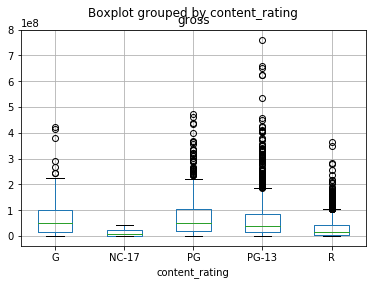

In [13]:
%matplotlib inline
boxplots = ratedMovies.boxplot(column='gross', by='content_rating', return_type='axes')

In [14]:
#ratedMovies.plot.density('gross')

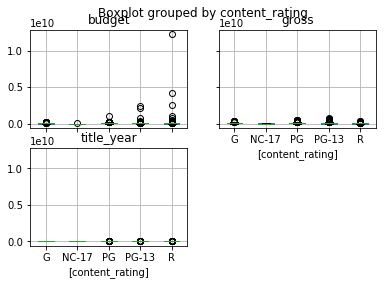

In [15]:
%matplotlib inline
boxplots = ratedMovies.boxplot( by='content_rating', return_type='axes')

In [16]:
import sklearn
X = ratedMovies.loc[:, ['gross','budget']].values 
y = ratedMovies.loc[:, 'content_rating'].values 

In [17]:
X

array([[  7.60505847e+08,   2.37000000e+08],
       [  3.09404152e+08,   3.00000000e+08],
       [  2.00074175e+08,   2.45000000e+08],
       ..., 
       [  4.24760000e+05,   7.00000000e+03],
       [  2.04092000e+06,   7.00000000e+03],
       [  8.52220000e+04,   1.10000000e+03]])

In [18]:
#X_scaled.mean(axis=0)

In [20]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=51, algorithm='auto', metric='minkowski', p=1, weights='distance')
imdb_knn_model = knn.fit(X_train, y_train) #the model/classifier
imdb_knn_model.score(X_test, y_test)

0.51103265666372466

In [22]:
from sklearn.metrics import confusion_matrix
y_pred = imdb_knn_model.predict(X_test)
cm_array = confusion_matrix(y_test, y_pred)

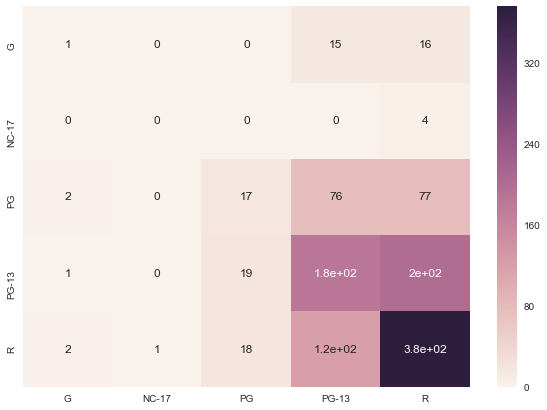

In [23]:
#%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

df_cm = pd.DataFrame(cm_array, index = [i for i in np.unique(y)],
                  columns = [i for i in np.unique(y)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [24]:
y_pred

array(['R', 'PG-13', 'R', ..., 'R', 'R', 'R'], dtype=object)